# Introduction




This notebook is based on An Introduction to Bioinformatics. This notebook will follow the progression of the textbook but the textbook should be consulted for more detailed explanations of the analyses.

This note book will cover the fundamentals of bioinformatics - how to interact with with raw sequence data, sequence alignment, and tree building. These are the most basic steps in bioinformatics and most analyses are based on these, or similar processes.

This notebook will cover:

   1. Sequence Quality
   2. Sequence Alignment
   3. Tree building



### The dataset

The dataset we will be using is from the paper Geography and Location Are the Primary Drivers of Office Microbiome Composition. The data represented is raw sequence data produced by an illumina MiSeq of the bacterial 16S rRNA gene. The sequences present are from a single sample that was taken from the floor of an office in Flagstaff Arizona.

### Obtain the files

In [12]:
#wget https://github.com/johnchase/plotly-notebook/raw/master/raw_data.tar.gz
#tar -xvzf raw_data.tar.gz                   save the file in your jupyter folder

In [9]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import colorlover as cl

import skbio
from skbio.alignment import global_pairwise_align_nucleotide
from skbio.sequence import DNA
import pandas as pd
import itertools
import numpy as np

In [34]:
py.sign_in('erik', '')

### 1. Sequence Quality


Because the quality of sequence data produced by high throughput sequencing varies between sequencing runs and samples it is important to look at the sequence quality and possibly filter or trim sequences, or remove samples where the quality is low. A more detailed description of the fastq format and quality scores can be found here. Quality scores themselves are difficult to interpret, so we will use scikit-bio to decode the scores for us. Here we load the sequence data into a generator with scikit-bio.

In [35]:
f = 'seqs_quals.fastq'
seqs = skbio.io.read(f, format='fastq', verify=False, variant='illumina1.8')

We can view one of the skbio.sequence._sequence.Sequence entries in the generator object. This will display the sequence data and associated metadata.

In [36]:
seq1 = seqs.__next__()
seq1

Sequence
-----------------------------------------------------------------------
Metadata:
    'description': 'M00365:23:000000000-A5A85:1:1101:19713:2393 2:N:0:0
                    orig_bc=TACCTCTCAGAA new_bc=TACCTCTCAGAA
                    bc_diffs=0'
    'id': '1AM1JR7QWMSFA_3665'
Positional metadata:
    'quality': <dtype: uint8>
Stats:
    length: 251
-----------------------------------------------------------------------
0   CCTGTTTGAT CCCCACGCTT TCGTGCCTCA GCGTCAATAA CACCATAGTA AGCTGCCTTC
60  GCAATCGGTG TTCTGTGACA TATCTATGCA TTTCACCGCT ACTTGTCACA TTCCGCCTAC
120 CTCTAGTGTA TTCAAGCTCA TCAGTATCAA GGGCACTGCG ATGGTTGAGC CACCGTCTTT
180 CACCCCTGAC TTAATAAGCC GCCTACGCAC CCTTTAAACC CAATAAATCC GGATAACGCT
240 TGGATCCTCC G

We can also view the sequence quality data for a given sequence (or sequences) by looking at the positional metadata.

In [37]:
seq1.positional_metadata.quality[:10]

0    33
1    33
2    33
3    33
4    33
5    37
6    37
7    37
8    37
9    37
Name: quality, dtype: uint8



Looking through sequence quality on a per-sequence basis is tedious and it would be diffult to decipher meaningful patterns, plotting the data is a better solution. In order to create a meaningful plot we will first create a pd.DataFrame object of the quality scores. Due to limitations in data size and because a subset of our data will fairly accurately represent the quality of the full data set we will only look at athe first 500 sequences in our data set.



In [38]:
seqs = skbio.io.read(f, format='fastq', verify=False, variant='illumina1.8')

df = pd.DataFrame()
num_sequences = 500

for count, seq in enumerate(itertools.islice(seqs, num_sequences)):
    df[count] = seq.positional_metadata.quality



Now that we have a dataframe with all of our quality scores it is easy to visualize them with plotly.

We can improve upon a basic boxplot by defining a specific color scheme. Fastq quality scores range from 0-40, and poor quality is often considered to be anything less then 20. Given this we will define a diverging colormap where an average quality score of below 20 will be a shade of red and anything above will be a shade of blue. (20 will be yellow). This will help with distinguishing regions of high versus low quality.

First define the colormap using color lover


In [39]:
purd = cl.scales['11']['div']['RdYlBu']
purd40 = cl.interp(purd, 40)

Now we can make boxplots of the quality scores on a per base basis

In [40]:
traces = []
for e in range(len(df)):
    traces.append(go.Box(
        y=df.iloc[e].values,
        name=e,
        boxpoints='all',
        whiskerwidth=0.2,
        marker=dict(
            size=.1,
            color=purd40[int(round(df.iloc[e].mean(), 0))]
        ),
        line=dict(width=1),
    ))

layout = go.Layout(
    title='Quality Score Distributions',
    yaxis=dict(
        title='Quality Score',
        autorange=True,
        showgrid=True,
        zeroline=True,
        gridcolor='#d9d4d3',
        zerolinecolor='#d9d4d3',
    ),
    xaxis=dict(
        title='Base Position',
    ),

    font=dict(family='Times New Roman', size=16, color='#2e1c18'),
    paper_bgcolor='#eCe9e9',
    plot_bgcolor='#eCe9e9'
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='quality-scores')


PlotlyRequestError: Aw, snap! You tried to use our API as the user 'Erik', but the supplied API key doesn't match our records. You can view your API key at https://plot.ly/settings/api

You're most likely getting this message because your local credentials file isn't synced with the Plotly server you're communicating with.

Go to https://plot.ly/<language>/getting-started (e.g., https://plot.ly/python/getting-started) for more information.

Make sure that you're logged in as Erik.

Need help? Please try searching Plotly's <a href='http://stackoverflow.com/questions/tagged/plotly'>Stack Overflow channel</a>.

# Plotting

pip install matplotlib

In [41]:
import pylab

Use the sample file plot.fasta which should be in your Biopython directory.

In [46]:
from Bio import SeqIO

In [47]:
records = [len(rec) for rec in SeqIO.parse("plot.fasta", "fasta")] 
len(records) 

11

In [48]:
max(records)

72

In [49]:
min(records) 

57

## Line Plot

Text(0.5, 0, 'sequence length')

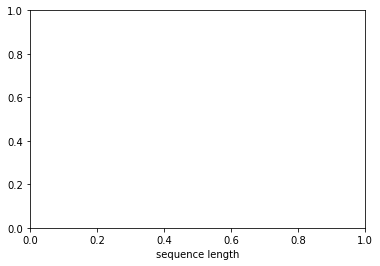

In [55]:
pylab.xlabel("sequence length") 

Text(0, 0.5, 'count')

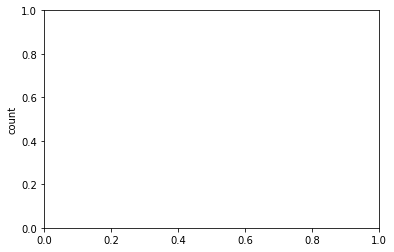

In [54]:
pylab.ylabel("count")  

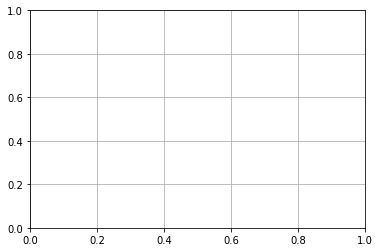

In [56]:
pylab.grid()

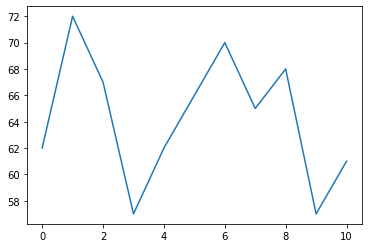

In [59]:
pylab.plot(records)
pylab.savefig("lines.png")

## Histogram

In [60]:
from Bio import SeqIO

In [78]:
import pylab

Text(0.5, 0, 'sequence length')

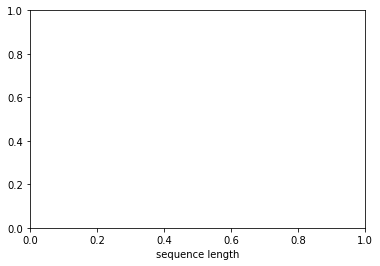

In [61]:
pylab.xlabel("sequence length") 

Text(0, 0.5, 'count')

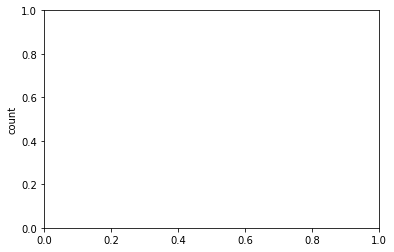

In [62]:
pylab.ylabel("count") 

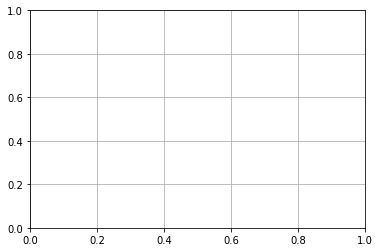

In [63]:
pylab.grid()

(array([2., 0., 1., 2., 0., 1., 2., 1., 1., 1.]), array([57. , 58.5, 60. , 61.5, 63. , 64.5, 66. , 67.5, 69. , 70.5, 72. ]), <a list of 10 Patch objects>)


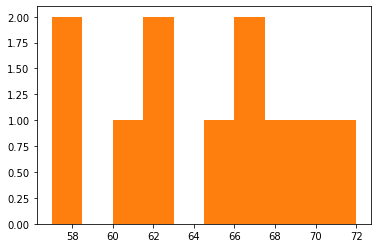

In [74]:
pylab.hist(records,bins=10) 
print(pylab.hist(records,bins=10))
pylab.savefig("hist.png")

## GC Percentage in Sequence

In [75]:
from Bio import SeqIO

In [77]:
from Bio.SeqUtils import GC 
gc = sorted(GC(rec.seq) for rec in SeqIO.parse("plot.fasta", "fasta"))
gc

[4.545454545454546,
 6.451612903225806,
 6.944444444444445,
 7.462686567164179,
 8.771929824561404,
 8.823529411764707,
 9.23076923076923,
 9.836065573770492,
 10.526315789473685,
 11.428571428571429,
 12.903225806451612]

In [79]:
import pylab

Text(0.5, 0, 'Genes')

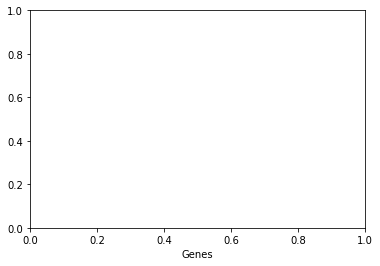

In [80]:
pylab.xlabel("Genes") 

Text(0, 0.5, 'GC Percentage')

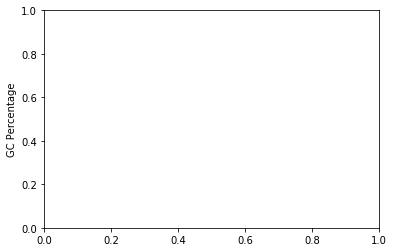

In [81]:
pylab.ylabel("GC Percentage") 

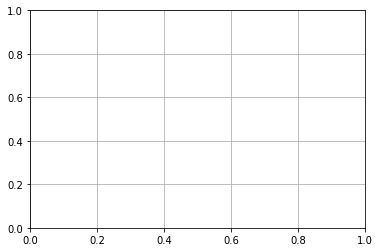

In [83]:
pylab.grid()

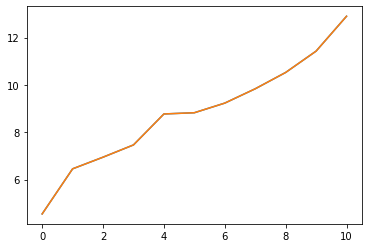

In [87]:
pylab.plot(gc) 
print(pylab.plot(gc))
pylab.savefig("gc.png")